# Goal:
The goal is to learn and implement fastai library concepts.

# Installation

In [1]:
!pip install fastai

# Imports

In [2]:
from fastai.data.all import *
from fastai.vision.all import *

# DataBlock Implmentation
https://docs.fast.ai/tutorial.datablock.html

In [3]:
print(help(untar_data))

print(f"\n\nDataset URL:\t{URLs.PETS}")

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = None) -> 'Path'
    Download `url` using `FastDownload.get`

None


Dataset URL:	https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz


In [4]:
path = untar_data(URLs.PETS)

In [5]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [6]:
help(get_image_files)

Help on function get_image_files in module fastai.data.transforms:

get_image_files(path, recurse=True, folders=None)
    Get image files in `path` recursively, only in `folders`, if specified.



In [7]:
fnames = get_image_files(path/"images")

In [8]:
type(fnames), fnames.items[:2], fnames.count

(fastcore.foundation.L,
 [Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_129.jpg'),
  Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_128.jpg')],
 <function list.count(value, /)>)

In [9]:
# create an empty datablock instance
# a datablock is a blueprint how to ensemble/put together your data
dblock = DataBlock()

In [10]:
# input a source 'fnames' here and convert source to datasets/dataloaders
dsets = dblock.datasets(fnames)

In [11]:
dsets.train[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_55.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_55.jpg'))

In [12]:
# get_image_files are assembled inside datablock
dblock = DataBlock(get_items = get_image_files)

In [13]:
# now pass source folder
dsets = dblock.datasets(path/"images")

In [14]:
dsets.train[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_97.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_97.jpg'))

In [15]:
# create a function logic to label files
# consider dog file names are all lowercase
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [16]:
dblock = DataBlock(get_items=get_image_files, get_y=label_func)

In [17]:
dsets = dblock.datasets(path/"images")

In [18]:
dsets.train[0]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_18.jpg'), 'cat')

In [19]:
dblock = DataBlock(get_items=get_image_files, get_y=label_func,
                   blocks=(ImageBlock, CategoryBlock)
                  )

In [20]:
dsets = dblock.datasets(path/"images")

In [21]:
dsets.train[0]

(PILImage mode=RGB size=333x500, TensorCategory(1))

In [22]:
dsets.vocab

['cat', 'dog']

In [23]:
# split the dataset for validation
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter()
)

In [24]:
dsets = dblock.datasets(path / "images")

In [25]:
dsets.train[0]

(PILImage mode=RGB size=500x333, TensorCategory(1))

In [26]:
# batch resize all images
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(),
    item_tfms=Resize(224)
)

In [27]:
dls = dblock.dataloaders(path/"images")

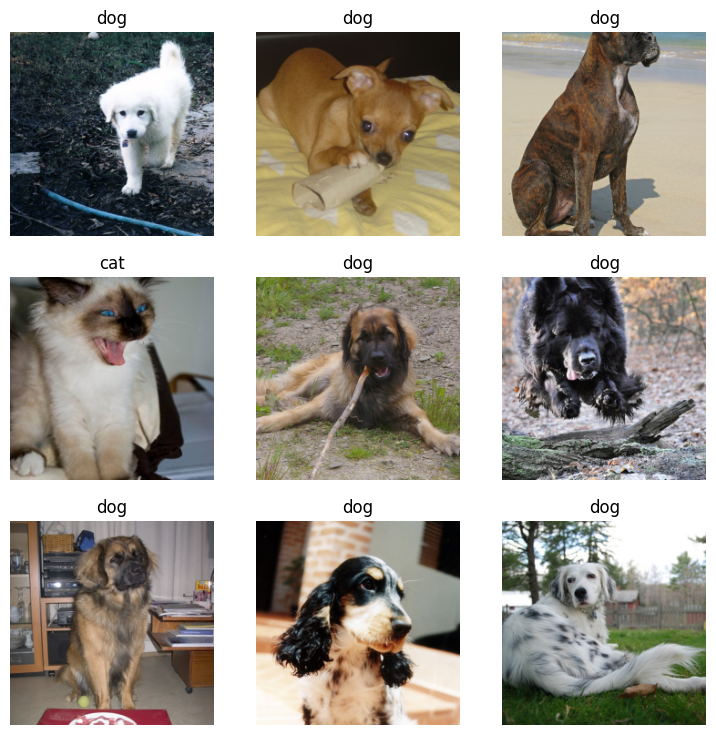

In [28]:
dls.show_batch()

## Single Label Example - MNIST

In [29]:
PILImageBW, parent_label, GrandparentSplitter()

(fastai.vision.core.PILImageBW,
 <function fastai.data.transforms.parent_label(o)>,
 <function fastai.data.transforms.GrandparentSplitter.<locals>._inner(o)>)

In [30]:
mnist = DataBlock(
    blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(),
)

In [31]:
dls = mnist.dataloaders(
    untar_data(URLs.MNIST_TINY)
)

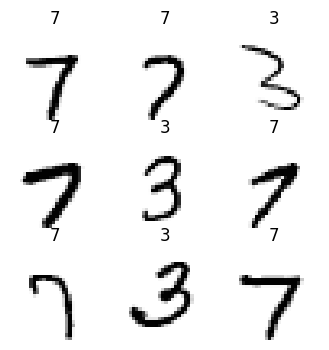

In [32]:
dls.show_batch(max_n=9, figsize=(4,4))

In [33]:
mnist.summary(untar_data(URLs.MNIST_TINY))

Setting-up type transforms pipelines
Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_tiny/train/3/9511.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      /root/.fastai/data/mnist_tiny/train/3/9511.png
    applying parent_label gives
      3
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(0))


Found 1428 items
2 datasets of sizes 709,699
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Setting up after_item: Pipeline: ToTensor


## Single Label Example - Pets

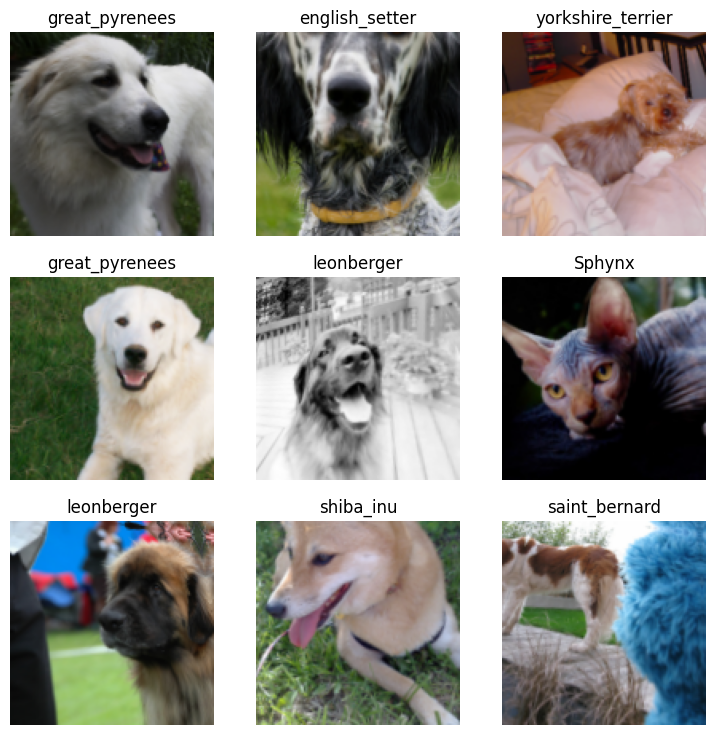

In [34]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=Pipeline([attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')]),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(),

)
dls = pets.dataloaders(untar_data(URLs.PETS) / "images")
dls.show_batch(max_n=9)

## Multi Label Example - Pascal

In [35]:
pascal_source = untar_data(URLs.PASCAL_2007)
df = pd.read_csv(pascal_source / "train.csv")
df.columns

Index(['fname', 'labels', 'is_valid'], dtype='str')

In [36]:
df.head()

fname        labels  is_valid
0  000005.jpg         chair      True
1  000007.jpg           car      True
2  000009.jpg  horse person      True
3  000012.jpg           car     False
4  000016.jpg       bicycle      True

In [37]:
# another method
pascal = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=lambda x : pascal_source / "train" / x["fname"],
    get_y=lambda x : x["labels"].split(),
    splitter=ColSplitter(),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
)

In [38]:
dls = pascal.dataloaders(df)

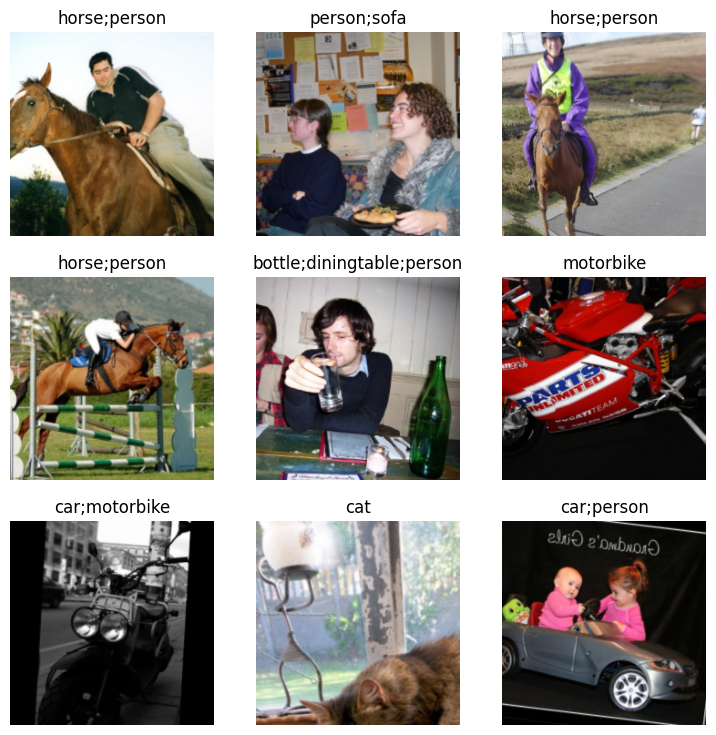

In [39]:
dls.show_batch()

In [40]:
# another method
def _pascal_items(x): return (
    f'{pascal_source}/train/'+x.fname, x.labels.str.split())

In [41]:
valid_idx = df[df['is_valid']].index.values

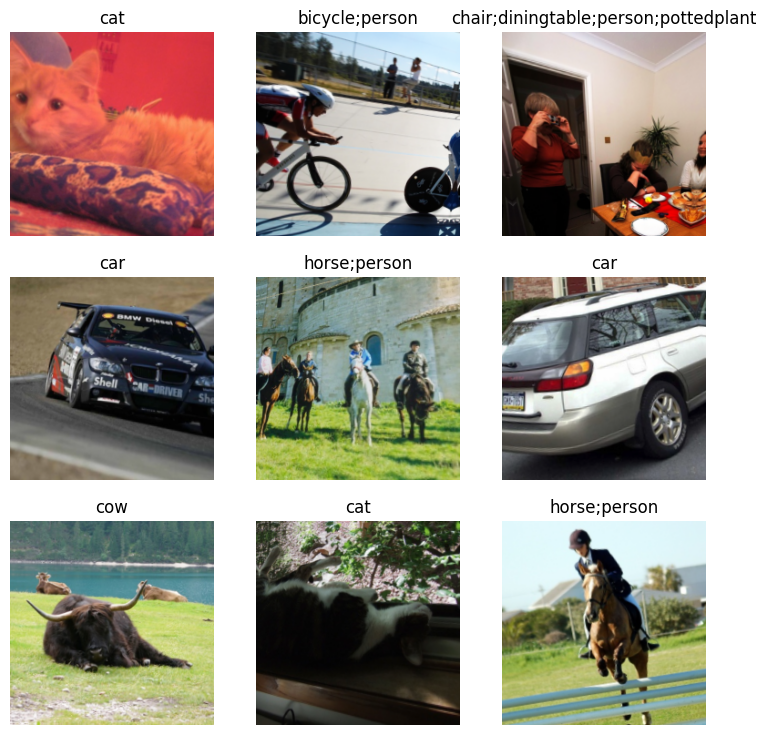

In [42]:
dls = pascal.dataloaders(df)
dls.show_batch()

# Image localization

## Segmentation
Input Image -> Output Segmentation Masks

In [43]:
path = untar_data(URLs.CAMVID_TINY)

In [44]:
np.loadtxt(path/'codes.txt', dtype=str)

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [45]:
label_func = lambda o : path / 'labels' / f'{o.stem}_P{o.suffix}'

In [46]:
label_func(Path("0006R0_f02610.png"))

Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f02610_P.png')

In [47]:
camvid = DataBlock(
    blocks = (ImageBlock, MaskBlock(codes=np.loadtxt(path/'codes.txt', dtype=str))),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(),
    batch_tfms=aug_transforms(),
)

In [48]:
dls = camvid.dataloaders(path / "images")

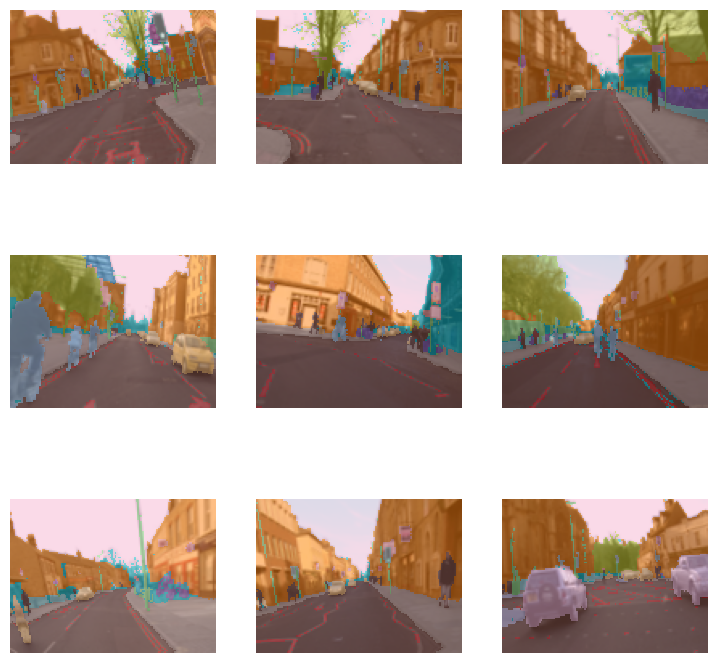

In [49]:
dls.show_batch()

## Points
Input Image -> Find Center of the people heads

In [50]:
biwi_source = untar_data(URLs.BIWI_SAMPLE)

In [51]:
fn2ctr = load_pickle(biwi_source / "centers.pkl")

In [52]:
biwi = DataBlock(
    blocks= (ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=lambda o : fn2ctr[o.name].flip(0),
    splitter=RandomSplitter(),
    batch_tfms=aug_transforms(),
)

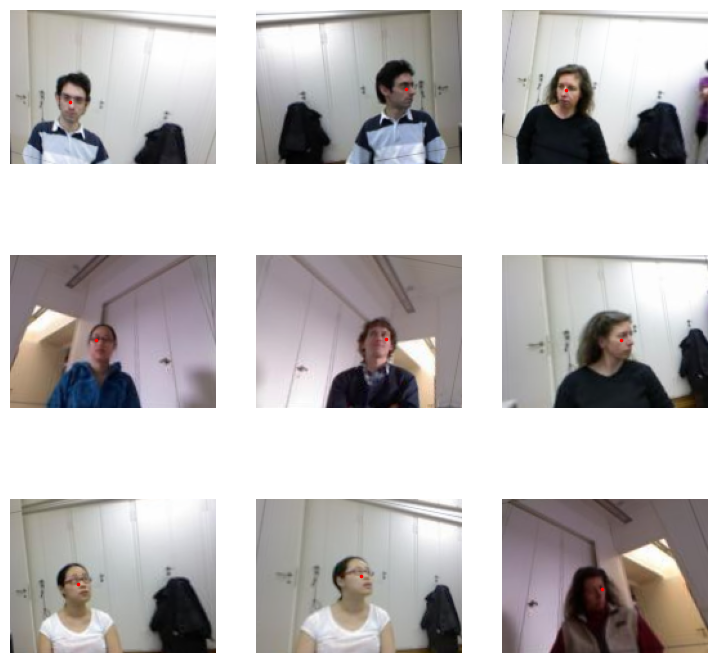

In [53]:
dls = biwi.dataloaders(
    biwi_source
)
dls.show_batch()

## Bounding boxes
Input Image -> Output Image has Box around Objects

In [54]:
coco_source = untar_data(URLs.COCO_TINY)

<div><progress max="801038" value="802816"></progress> 100.22% [802816/801038 00:05&lt;00:00]</div>

In [56]:
images, lbl_bbox = get_annotations(coco_source / "train.json")
img2bbox = dict(zip(images, lbl_bbox))

In [60]:
img2bbox["000000542959.jpg"][1]

['chair', 'vase', 'vase', 'chair', 'chair', 'chair']

In [62]:
coco = DataBlock(
    blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
    get_items=get_image_files,
    get_y=[lambda o : img2bbox[o.name][0], lambda o : img2bbox[o.name][1]],
    splitter=RandomSplitter(),
    item_tfms = Resize(128),
    batch_tfms=aug_transforms(),
    n_inp=1
)

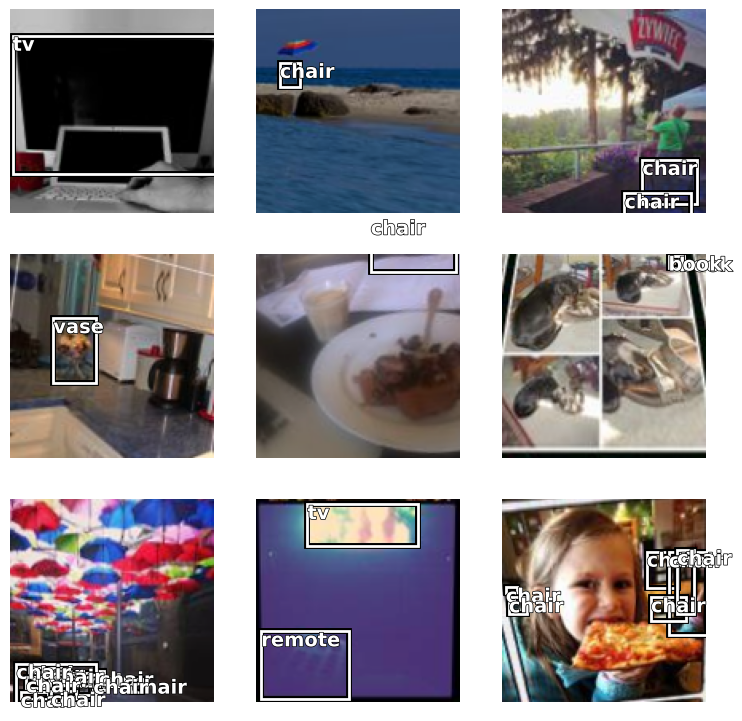

In [64]:
dls = coco.dataloaders(coco_source)
dls.show_batch(max_n=9)

# Text

In [66]:
from fastai.text.all import *

In [67]:
path = untar_data(URLs.IMDB_SAMPLE)
df = pd.read_csv(path/'texts.csv')
df.head()

<div><progress max="571827" value="573440"></progress> 100.28% [573440/571827 00:04&lt;00:00]</div>

label  \
0  negative   
1  positive   
2  negative   
3  positive   
4  negative   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
0                                                                                                                                                                                                    Un-bleeping-believable! Meg Ryan doesn't even look her usual pert lovable self in this, which normally makes me forgive her shallow ticky acting schtick. Hard to believe she was the producer on this dog. Plus Kevin Kline: what kind of suicide trip has his career been on? Whoosh... Banzai!!! Finally this was directed by the guy who did Big Chill? Must be a replay of Jonestown - hollywood style. Wooofff!   
1  This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is som...   
2  Every once in a long while a movie will come along that will be so awful that I feel compelled to warn people. If I labor all my days and I can save but one soul from watching this movie, how great will be my joy.<br /><br />Where to begin my discussion of pain. For starters, there was a musical montage every five minutes. There was no character development. Every character was a stereotype. We had swearing guy, fat guy who eats donuts, goofy foreign guy, etc. The script felt as if it were being written as the movie was being shot. The production value was so incredibly low that it felt li...   
3  Name just says it all. I watched this movie with my dad when it came out and having served in Korea he had great admiration for the man. The disappointing thing about this film is that it only concentrate on a short period of the man's life - interestingly enough the man's entire life would have made such an epic bio-pic that it is staggering to imagine the cost for production.<br /><br />Some posters elude to the flawed characteristics about the man, which are cheap shots. The theme of the movie "Duty, Honor, Country" are not just mere words blathered from the lips of a high-brassed offic...   
4  This movie succeeds at being one of the most unique movies you've seen. However this comes from the fact that you can't make heads or tails of this mess. It almost seems as a series of challenges set up to determine whether or not you are willing to walk out of the movie and give up the money you just paid. If you don't want to feel slighted you'll sit through this horrible film and develop a real sense of pity for the actors involved, they've all seen better days, but then you realize they actually got paid quite a bit of money to do this and you'll lose pity for them just like you've alr...   

   is_valid  
0     False  
1     False  
2     False  
3     False  
4     False

In [73]:
imdb_lm = DataBlock(
    blocks=(
        TextBlock.from_df(
            'text',
            is_lm=True,
        )
    ),
    get_x=ColReader('text'),
    splitter=ColSplitter(),
)

In [76]:
dls = imdb_lm.dataloaders(
    df, 
    bs=64,
    seq_len=72
)
dls.show_batch(max_n=3)

xxbos xxmaj if you find yourself in need of an escape , something that will hold your attention for two hours and allow you to be lost in another world , xxmaj domino will satisfy that need . xxmaj this is entertainment , after all ! xxmaj the plot keeps your brain in motion - one of those movies ( like xxmaj usual xxmaj suspects ) where you want to see it
and let 's hope another xxunk wo n't change this , because the mccartney catalog is pretty good . xxbos xxmaj xxunk , set the xxunk machine for … 1986 . xxmaj the xxmaj united xxmaj states was just xxunk out of its worst xxunk xxunk , while xxmaj japan was enjoying an xxunk industrial boom . xxmaj xxunk xxunk were still a significant part of the xxup us economy , and
xxunk , " sword xxmaj of xxmaj justice " became an xxunk favorite of mine , and i was therefore more than eager to find the sequels , and full of anticipation when i finally stumbled over them recently . xxmaj while this third " hanzo " film is just not quite as brillian

## Text classification

In [78]:
dls.vocab

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 'the',
 ',',
 '.',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that',
 'this',
 '"',
 "'s",
 '-',
 'was',
 '\n\n',
 'as',
 'for',
 'movie',
 'with',
 'but',
 'film',
 'you',
 ')',
 'on',
 '(',
 "n't",
 'are',
 'not',
 'he',
 'his',
 'have',
 'be',
 'one',
 'they',
 'all',
 'at',
 'by',
 'an',
 'like',
 'from',
 'so',
 'who',
 '!',
 'there',
 'about',
 'or',
 'just',
 'if',
 'out',
 'do',
 'her',
 'some',
 'what',
 'has',
 "'",
 'more',
 'good',
 '?',
 'very',
 'up',
 'when',
 'she',
 'would',
 'no',
 'were',
 'their',
 'even',
 'time',
 'really',
 'only',
 'my',
 'can',
 'story',
 'had',
 'which',
 '…',
 'see',
 'did',
 'me',
 'we',
 'well',
 'into',
 'does',
 ':',
 'will',
 'bad',
 'than',
 'also',
 'get',
 'much',
 'people',
 'because',
 'could',
 'other',
 'first',
 'been',
 'how',
 'any',
 'its',
 'most',
 'then',
 'great',
 'make',
 'two',
 'made',
 'him',
 'them',
 'way',
 '/',

In [82]:
seq_len = 72
imdb_clas = DataBlock(
    blocks=(
        TextBlock.from_df(
            'text', 
            seq_len=seq_len, 
            vocab=dls.vocab
        ),
        CategoryBlock
    ),
    get_x=ColReader('text'),
    get_y=ColReader('label'),
    splitter=ColSplitter(),
)

In [83]:
dls = imdb_lm.dataloaders(df, bs=64)
dls.show_batch()

xxbos xxmaj nick xxmaj cage is xxmaj xxunk xxmaj raines , a retired car thief who is forced out of retirement when he 's forced to save his the life of his brother xxmaj xxunk ( giovanni xxmaj ribisi ) when he screws up on a job , by xxunk his brothers job of stealing 50 cars in one night . xxmaj he has to get together his old crew that he
, it gives an interesting glimpse into xxunk rule in xxmaj africa that you 'll rarely find in other films . xxmaj it does bear a superficial similarity to xxup out xxup of xxmaj africa , but without all the romantic fluff . xxmaj the xxmaj white xxmaj french people in xxmaj xxunk are fascinating because they do n't even seem to regard the natives as people . xxmaj the xxmaj whites
mentally captive ? xxmaj such audience xxunk must have a purpose . 

 xxmaj part2 is more xxunk than xxmaj part1 , but it 's literally mind - numbing with its repetitive bush - bashing , misery of outlook , and lack of variety or character xxunk . deltoro 's xxmaj che has n

# Tabular Data

In [84]:
from fastai.tabular.core import *

In [85]:
adult_source = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(adult_source/'adult.csv')
df.head()

<div><progress max="968212" value="974848"></progress> 100.69% [974848/968212 00:03&lt;00:00]</div>

age          workclass  fnlwgt     education  education-num  \
0   49            Private  101320    Assoc-acdm           12.0   
1   44            Private  236746       Masters           14.0   
2   38            Private   96185       HS-grad            NaN   
3   38       Self-emp-inc  112847   Prof-school           15.0   
4   42   Self-emp-not-inc   82297       7th-8th            NaN   

        marital-status        occupation    relationship                 race  \
0   Married-civ-spouse               NaN            Wife                White   
1             Divorced   Exec-managerial   Not-in-family                White   
2             Divorced               NaN       Unmarried                Black   
3   Married-civ-spouse    Prof-specialty         Husband   Asian-Pac-Islander   
4   Married-civ-spouse     Other-service            Wife                Black   

       sex  capital-gain  capital-loss  hours-per-week  native-country salary  
0   Female             0          1902              40   United-States  >=50k  
1     Male         10520             0              45   United-States  >=50k  
2   Female             0             0              32   United-States   <50k  
3     Male             0             0              40   United-States  >=50k  
4   Female             0             0              50   United-States   <50k

In [86]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']

In [87]:
procs = [Categorify, FillMissing, Normalize]

In [88]:
splits = RandomSplitter()(range_of(df))

In [90]:
to = TabularPandas(df, 
                   procs, 
                   cat_names, 
                   cont_names, 
                   y_names="salary", 
                   splits=splits, 
                   y_block=CategoryBlock)

/usr/local/lib/python3.12/site-packages/fastai/tabular/core.py:314: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  to[n].fillna(self.na_dict[n], inplace=True)


In [91]:
dls = to.dataloaders()
dls.show_batch()

/usr/local/lib/python3.12/site-packages/fastai/torch_core.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)
  else as_tensor(x.values, **kwargs) if isinstance(x, (pd.Series, pd.DataFrame))


# Resources

https://docs.fast.ai/tutorial.datablock.html